<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solution for </font>Operations on the Unit Circle </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task3"></a>
<h3> Task 3</h3>

Randomly pick an angle $ \theta \in [0,2\pi) $.

Suppose that we have 1000 copies of quantum state $ \ket{v} = \myvector{ \cos \theta \\ \sin \theta } $ and we measure each of them.

What are the expected numbers of observing the states 0 and 1?

Implement the above experiment by designing a quantum circuit and set the quantum state by using ry-gate.

Compare your experimental and analytic results.

Repeat the task a couple of times.

<h3> Solution </h3>

**Analytical results**

In [1]:
from random import randrange
from math import sin,cos, pi

# randomly pick an angle
random_angle = randrange(360)
print("random angle is",random_angle)

# pick angle in radian
rotation_angle = random_angle/360*2*pi

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

random angle is 206
The expected value of observing '0' is 807.8307
The expected value of observing '1' is 192.1693


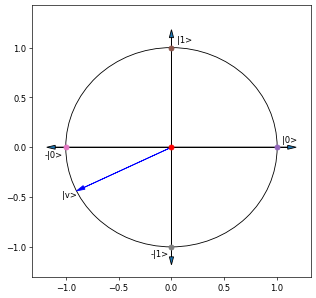

In [2]:
# draw the quantum state

%run quantum.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

show_plt()

**Experimental results**

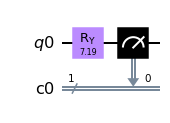

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
qc.ry(2*rotation_angle,q[0]) 

# measure the qubit
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

{'0': 806, '1': 194}


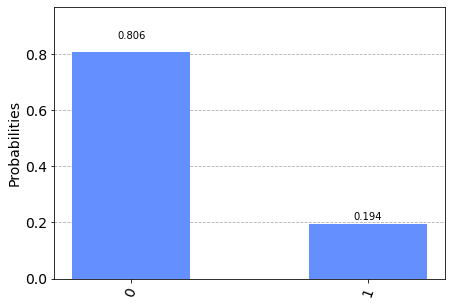

In [4]:
# execute the program 1000 times
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(qc)
print(counts)

the_observed_number_of_ones = 0
if '1' in counts:
    the_observed_number_of_ones= counts['1']

# draw the histogram
plot_histogram(counts)

**Compare the results**

In [5]:
difference = abs(the_expected_number_of_ones - the_observed_number_of_ones)
print("The expected number of ones is",the_expected_number_of_ones)
print("The observed number of ones is",the_observed_number_of_ones)
print("The difference is",difference)
print("The difference in percentage is",difference/100,"%")

The expected number of ones is 192.16926233717055
The observed number of ones is 194
The difference is 1.8307376628294492
The difference in percentage is 0.018307376628294493 %
